# Analyses statistiques

Dans cette section, nous allons réaliser différentes analyses statistiques afin de continuer de préparer les données d'entraînement du modèle.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import f_oneway
from scipy.stats import spearmanr

In [28]:
df = pd.read_csv('data/data_cleaned.csv', encoding='utf-8', sep=';')

In [29]:
df.head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [30]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()

## Analyse univariée

In [31]:
df[numeric_cols].describe().round(2)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1513.00,1513.00,1513.00,1513.00,1513.00,1513.00,1509.00,1513.00,1513.00,969.00,...,1513.00,1.513000e+03,1.513000e+03,1.513000e+03,1513.00,1.513000e+03,1513.00,1.513000e+03,1513.00,1513.00
mean,1961.41,1.11,4.25,115055.26,13778.46,101276.80,93542.07,19943.75,3421.25,63.76,...,186.25,8.233521e+06,8.452260e+06,4.986616e+05,1676530.51,5.720322e+06,19925.54,1.992554e+06,184.19,1.64
std,32.89,1.21,6.82,198784.40,43868.83,176160.84,163015.45,52800.99,18830.95,28.66,...,188.94,2.244798e+07,2.297762e+07,5.353449e+06,4059658.41,1.385155e+07,97707.21,9.770721e+06,733.82,2.37
min,1900.00,0.00,0.00,11285.00,0.00,10925.00,5656.00,0.00,0.00,1.00,...,0.00,5.713320e+04,5.811420e+04,0.000000e+00,1.00,3.000000e+00,0.00,0.000000e+00,0.40,0.01
25%,1929.00,1.00,1.00,28800.00,0.00,27800.00,24955.00,0.00,0.00,44.00,...,85.40,1.242812e+06,1.326178e+06,0.000000e+00,213184.50,7.273860e+05,0.00,0.000000e+00,20.18,0.36
50%,1965.00,1.00,2.00,47686.00,0.00,45743.00,41591.00,0.00,0.00,71.00,...,141.60,2.655388e+06,2.805826e+06,0.000000e+00,491332.41,1.676426e+06,4768.32,4.768320e+05,49.53,0.88
75%,1988.00,1.00,4.00,106000.00,0.00,94948.00,91645.00,13660.00,0.00,88.00,...,212.90,7.221482e+06,7.419337e+06,0.000000e+00,1533866.75,5.233553e+06,14938.00,1.493800e+06,141.20,1.95
max,2015.00,27.00,99.00,2200000.00,512608.00,2200000.00,1719643.00,639931.00,459748.00,100.00,...,2620.00,4.483853e+08,4.716139e+08,1.349435e+08,80460872.00,2.745325e+08,2979090.00,2.979090e+08,16870.98,34.09


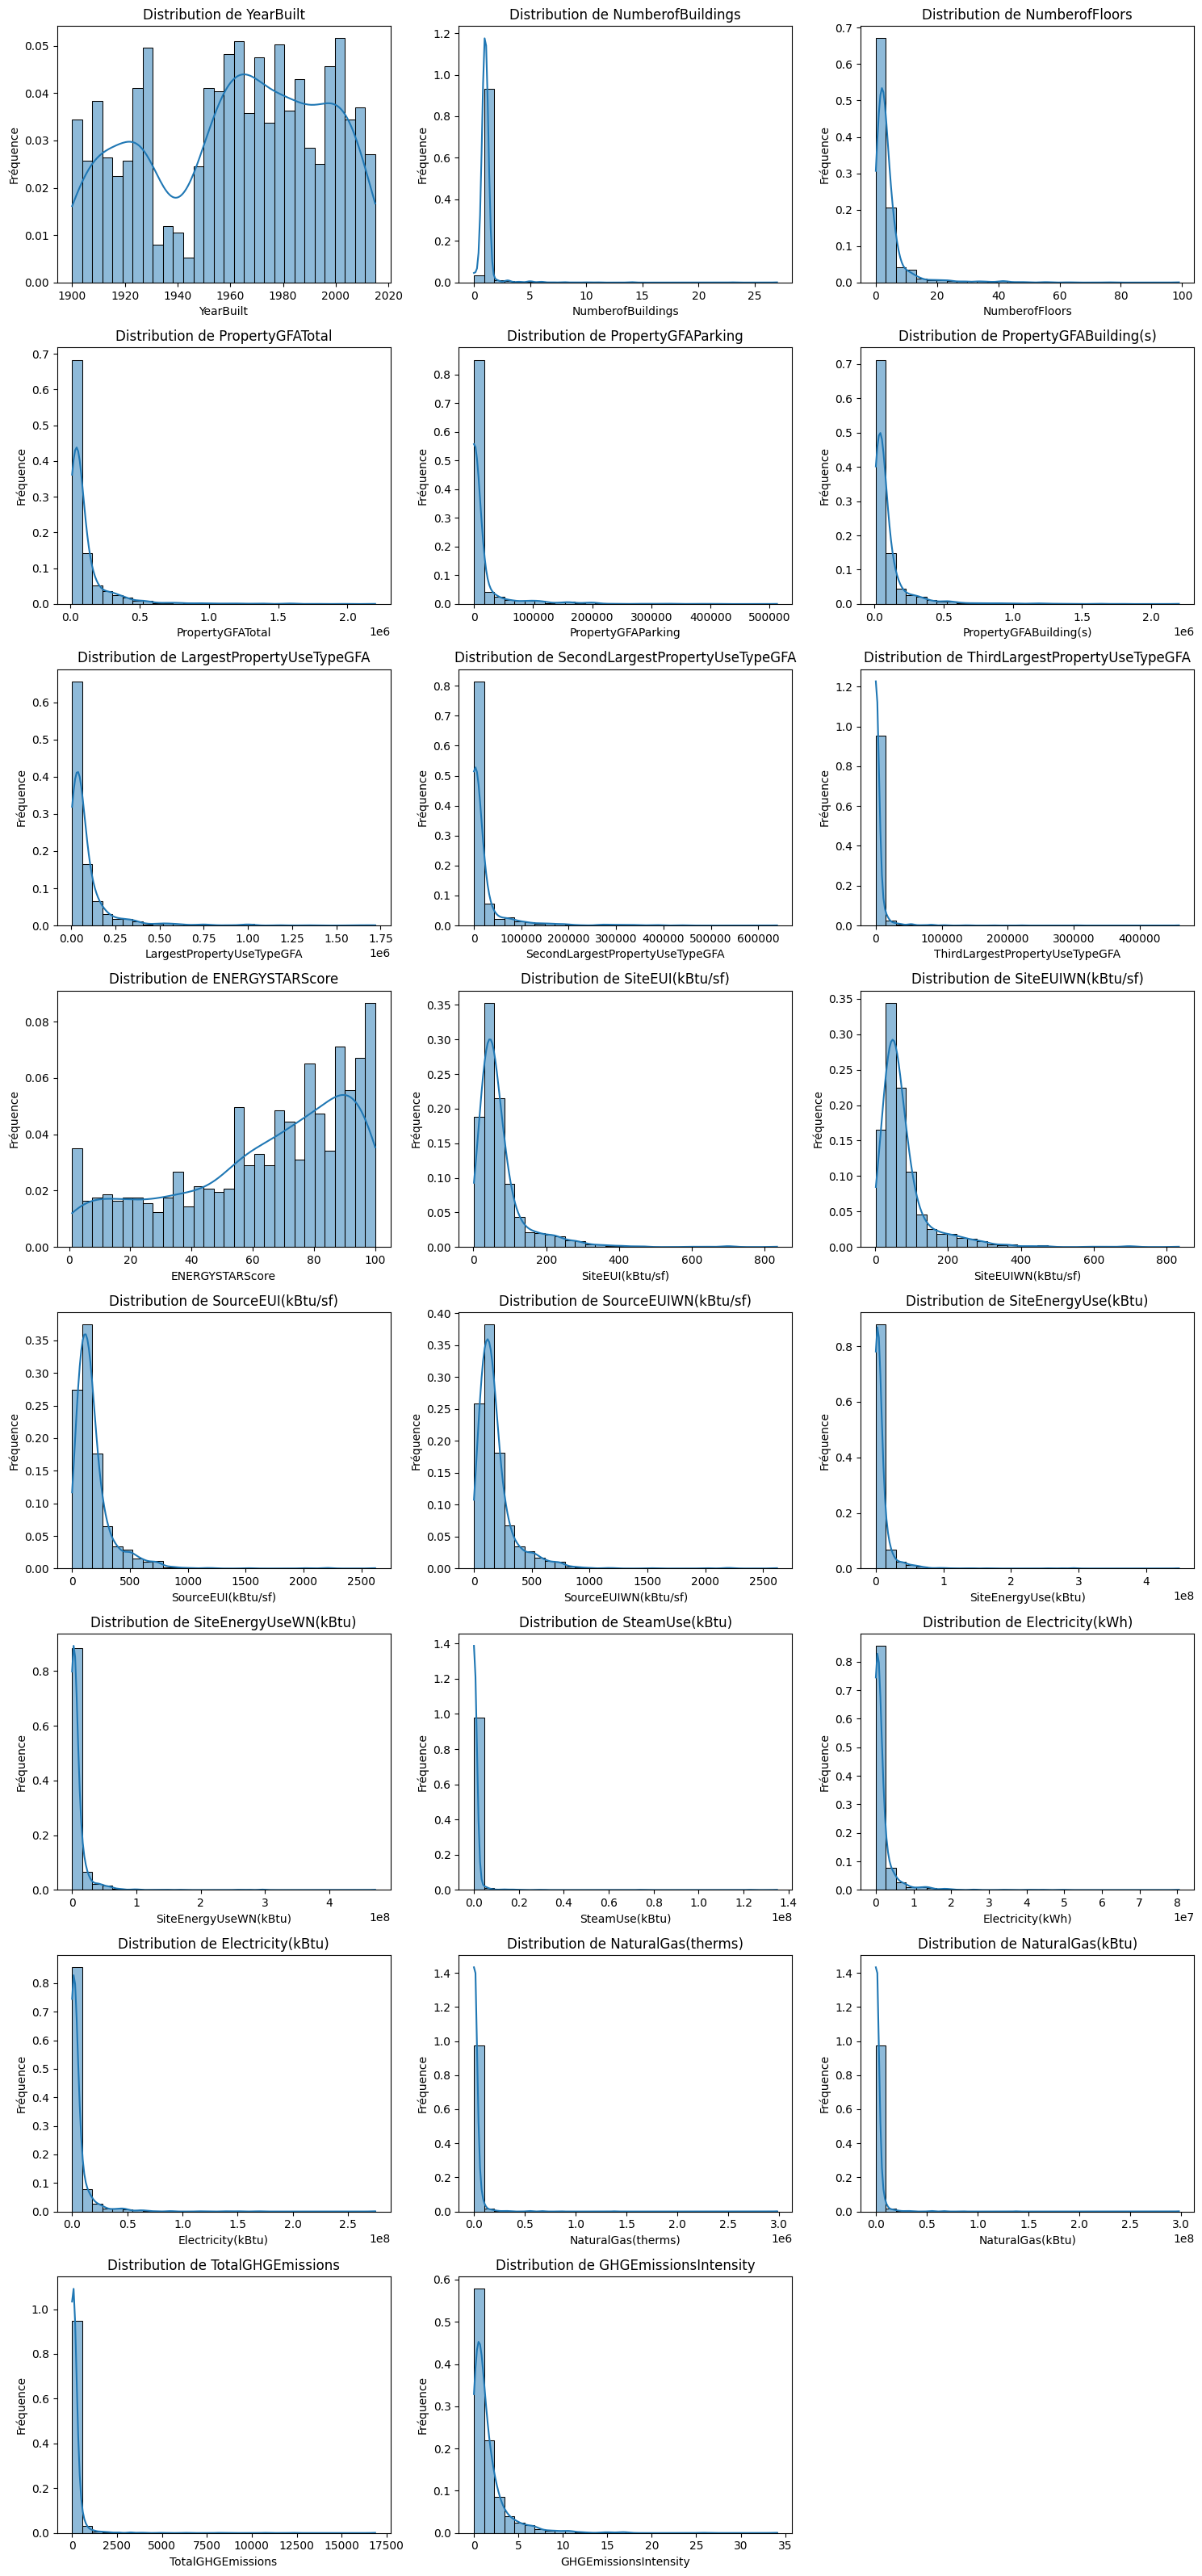

In [32]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, stat='probability', bins=30, ax=axes[i])
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Distribution de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

On observe que beaucoup de variables numériques présentent des distributions très asymétriques.

Cela indique que certains bâtiments, en petit nombre, ont des consommations énergétiques très importantes.

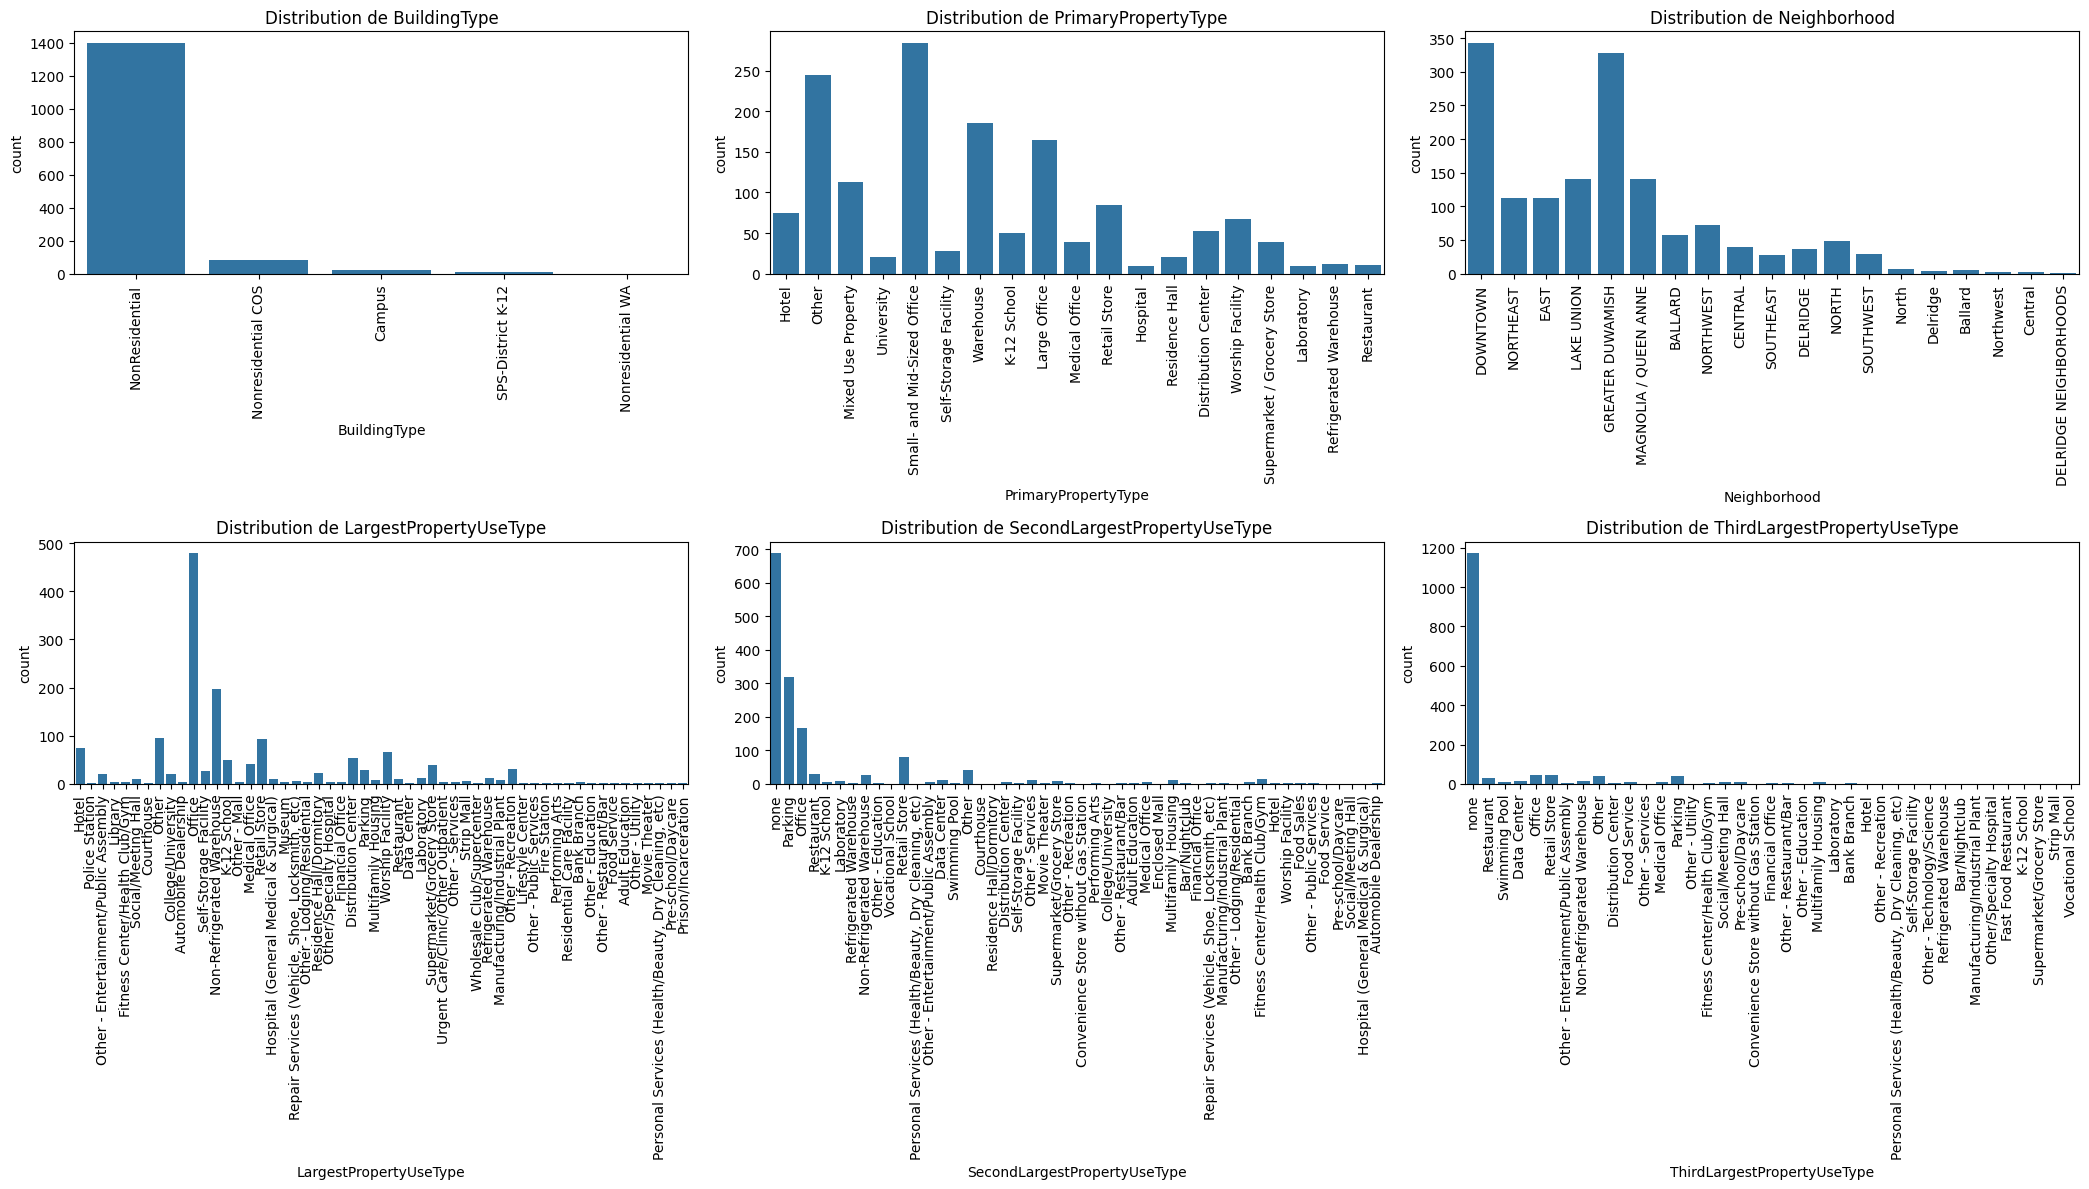

In [33]:
n_cols = 3  # Nombre de colonnes dans la grille
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].tick_params(axis='x', rotation = 90)  # Rotation des labels pour lisibilité

# Supprimer les axes vides si besoin
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [34]:
df['Neighborhood'] = df['Neighborhood'].str.upper()
df['Neighborhood'] = df['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', regex=False)

### Analyse bivariée

Afin de détecter les variables ayant une forte corrélation et donc potentiellemnt pouvant introduire du data leakage, nous allons observer les coefficients de corrélation entre ces variables.

In [35]:
col_corr = ['NumberofBuildings',
            'NumberofFloors',
            'YearBuilt',
            'PropertyGFATotal',
            'ENERGYSTARScore',
            'SiteEUI(kBtu/sf)',
            'SiteEUIWN(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'SourceEUIWN(kBtu/sf)',
            'SiteEnergyUse(kBtu)',
            'SiteEnergyUseWN(kBtu)',
            'Electricity(kWh)',
            'Electricity(kBtu)',
            'NaturalGas(therms)',
            'NaturalGas(kBtu)',
            'TotalGHGEmissions',
            'GHGEmissionsIntensity']

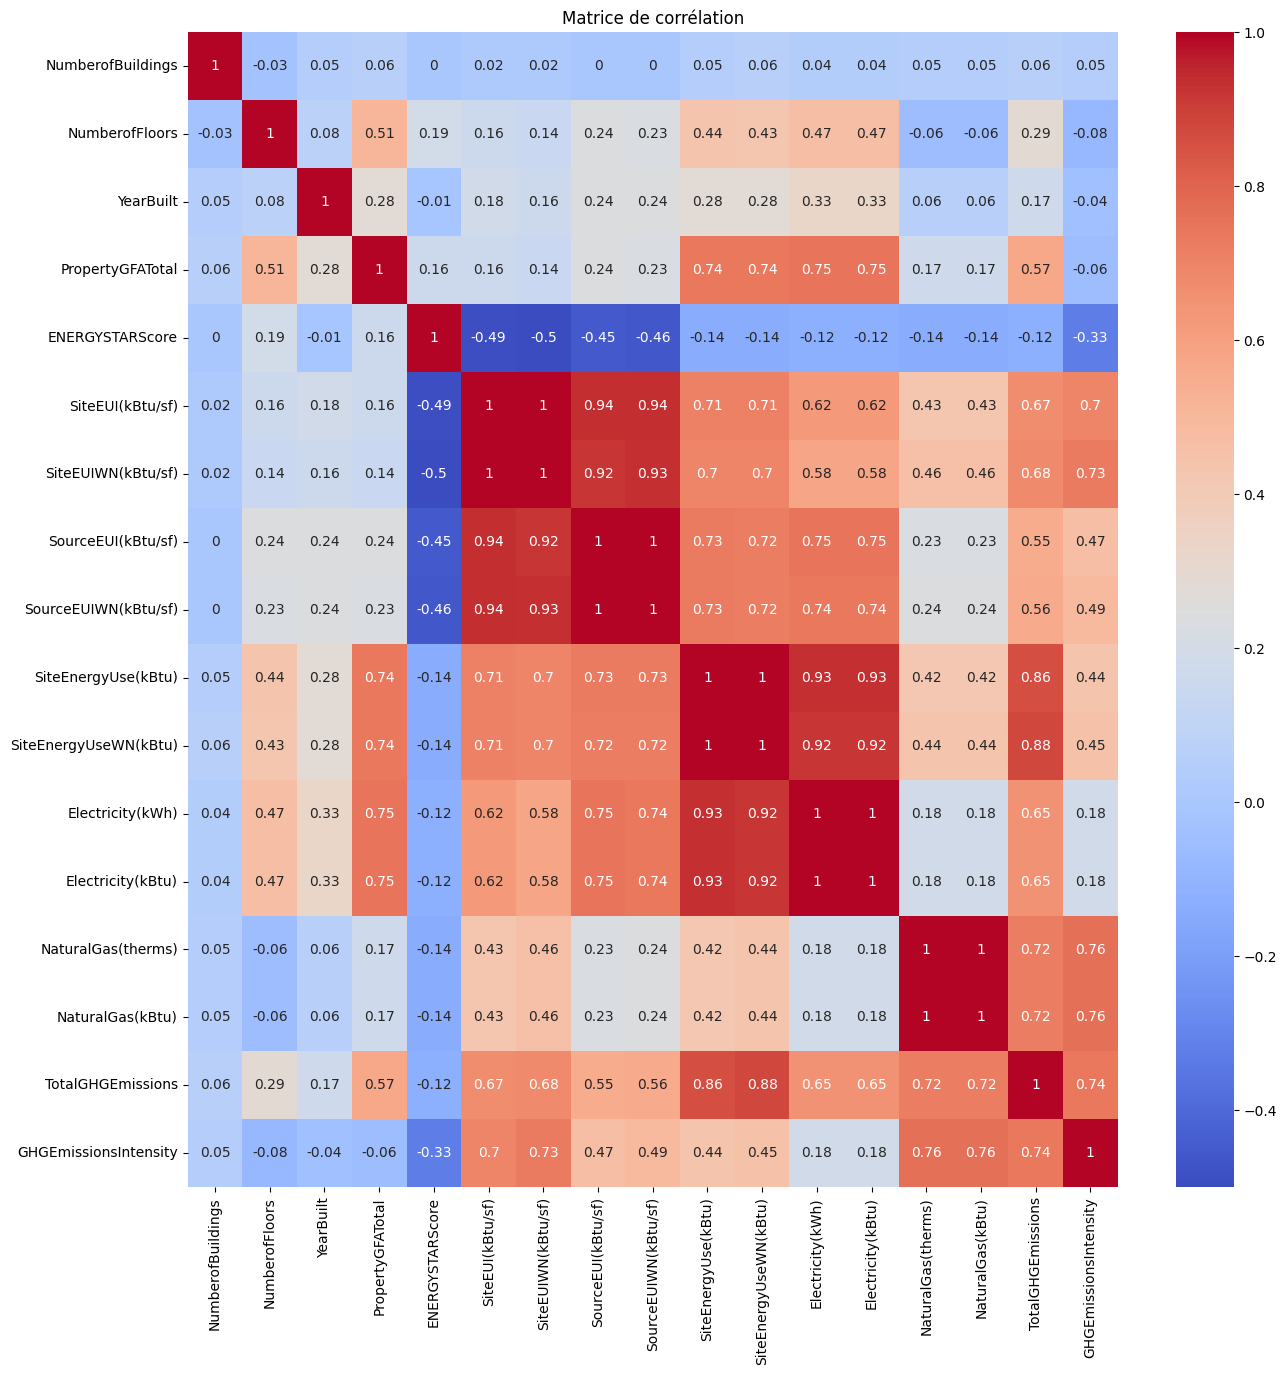

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df[col_corr].corr(method='spearman').round(2), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Les variables cibles pour notre modèle sont "SiteEnergyUseWN(kBtu)" et "TotalGHGEmissions". La première est dépendante des consommations des différentes sources d'énergie et la seconde dépendante de la première. Certaines variables sont également redondantes comme les consommations d'électricité et de gaz naturel exprimées dans différentes unité.

Pour ne pas introduire de data leakage, nous allons supprimer ces colonnes.

In [37]:
data_leakage_col = ['SiteEUI(kBtu/sf)',
                    'ENERGYSTARScore',
                    'SiteEUIWN(kBtu/sf)',
                    'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)',
                    'Electricity(kWh)',
                    'NaturalGas(therms)',
                    'GHGEmissionsIntensity']

In [38]:
df = df.drop(columns=data_leakage_col)

### Détection Outliers

Bien que nous ayons supprimer les données outliers dans le notebook précédent, nous allons tout de même observer s'il n'en reste pas dans le dataset.

In [39]:
col_outliers = df.select_dtypes(include='number').columns

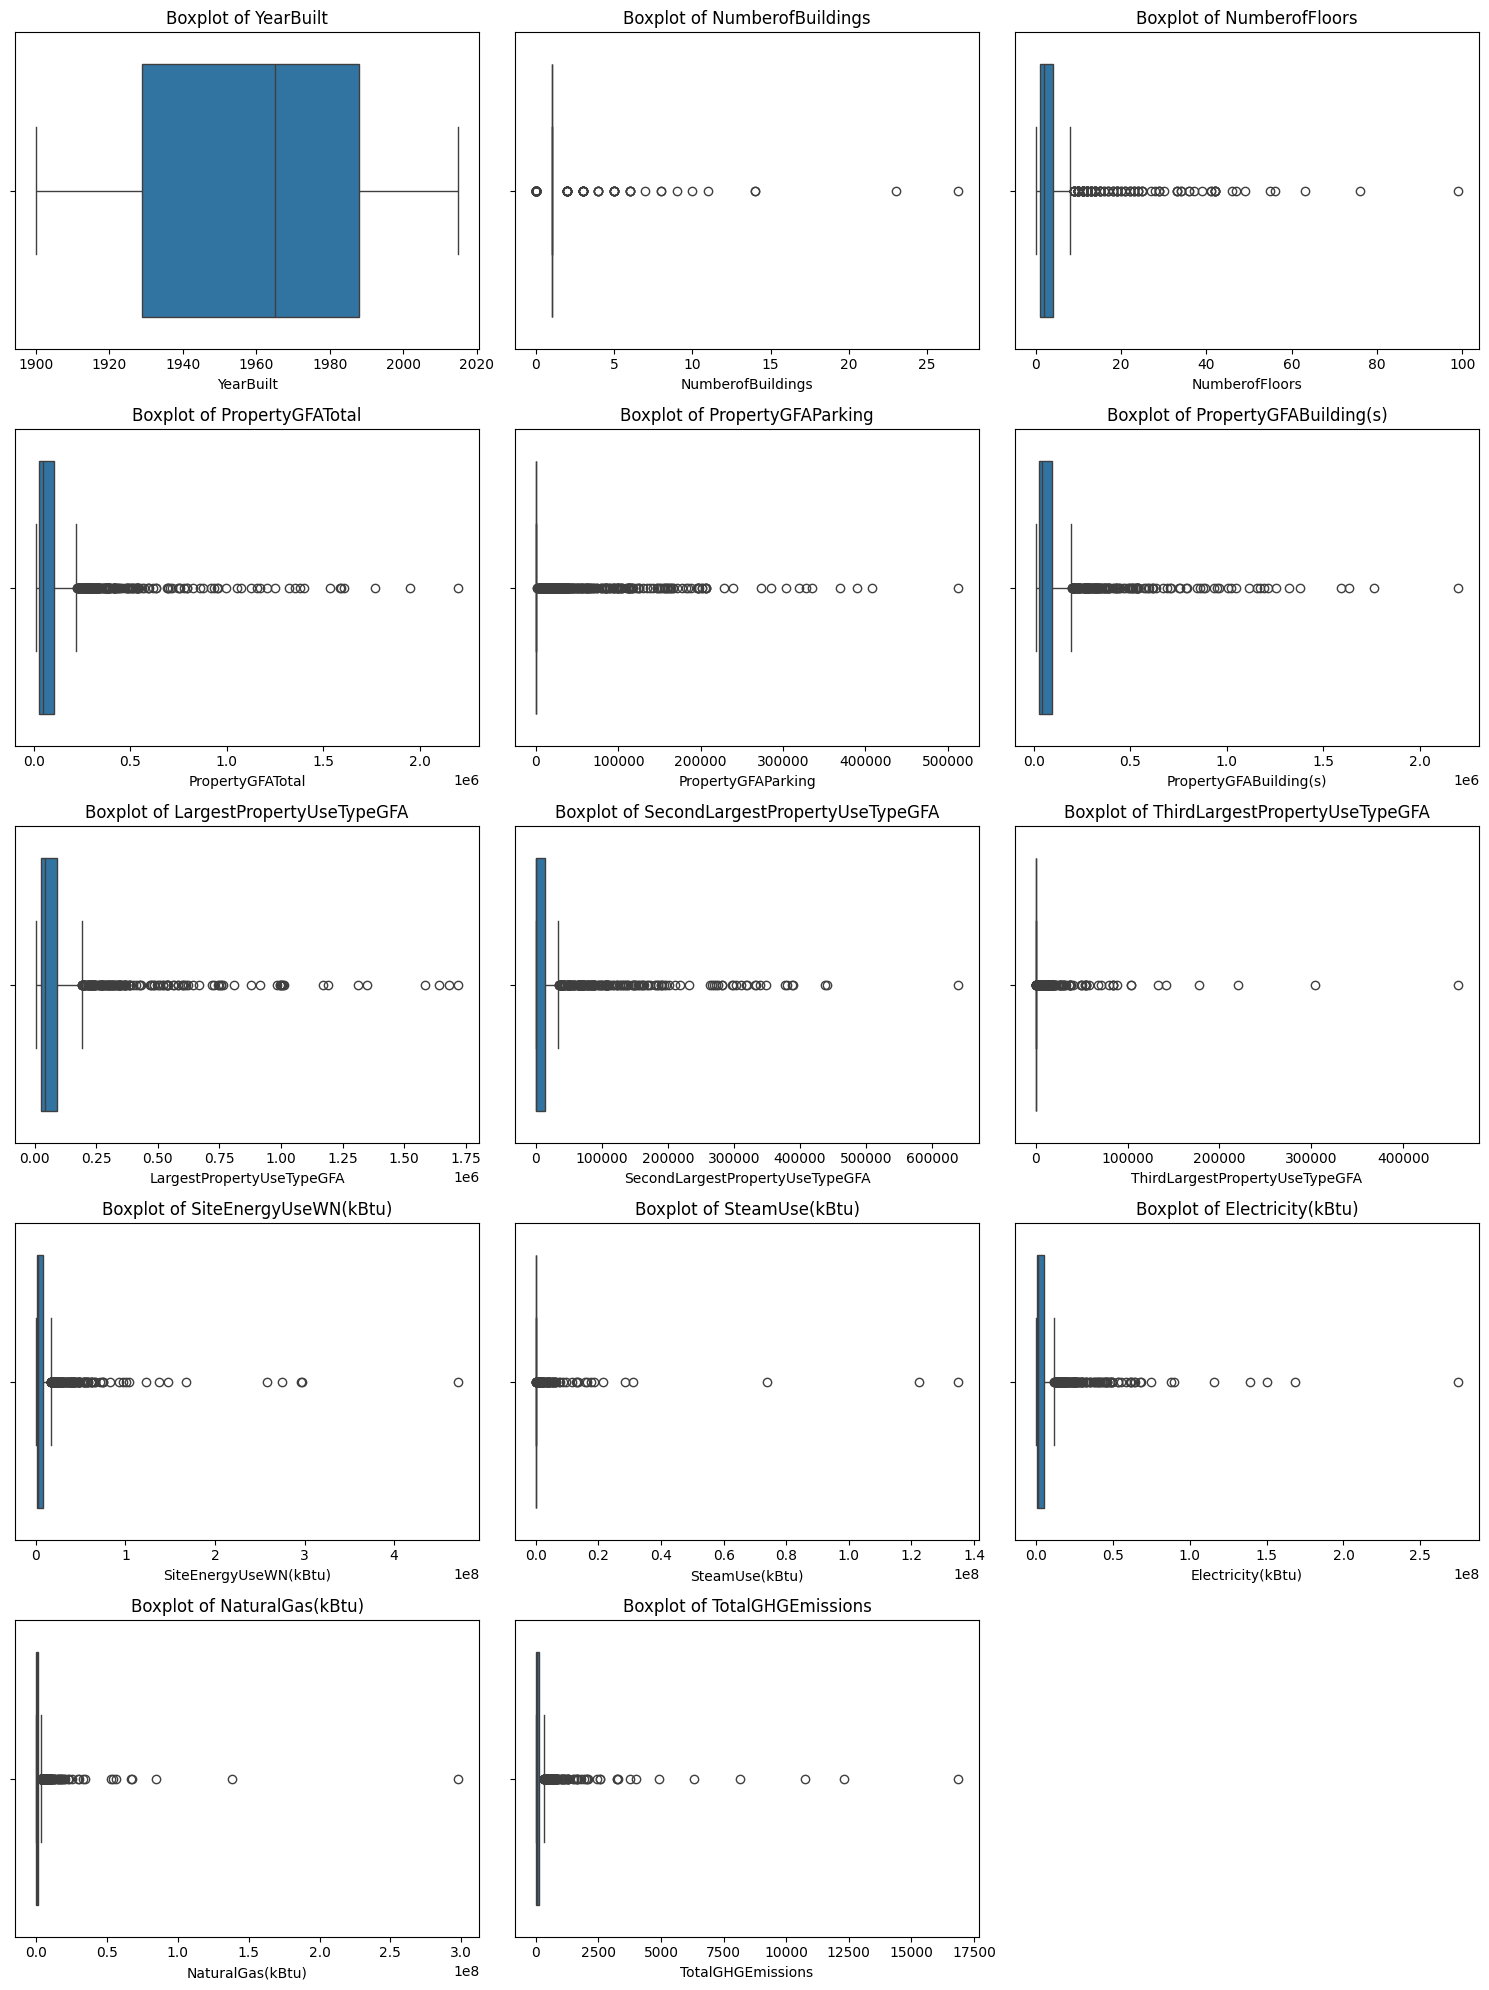

In [40]:
n_cols = 3
n_rows = (len(col_outliers) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(col_outliers):
    sns.boxplot(df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Nous avons un bâtiment avec plus de 80 étages, il dénote particulièrement et pourrait biaisé notre modèle, nous allons donc le supprimer du dataset.

In [41]:
df = df[df['NumberofFloors']< 80]

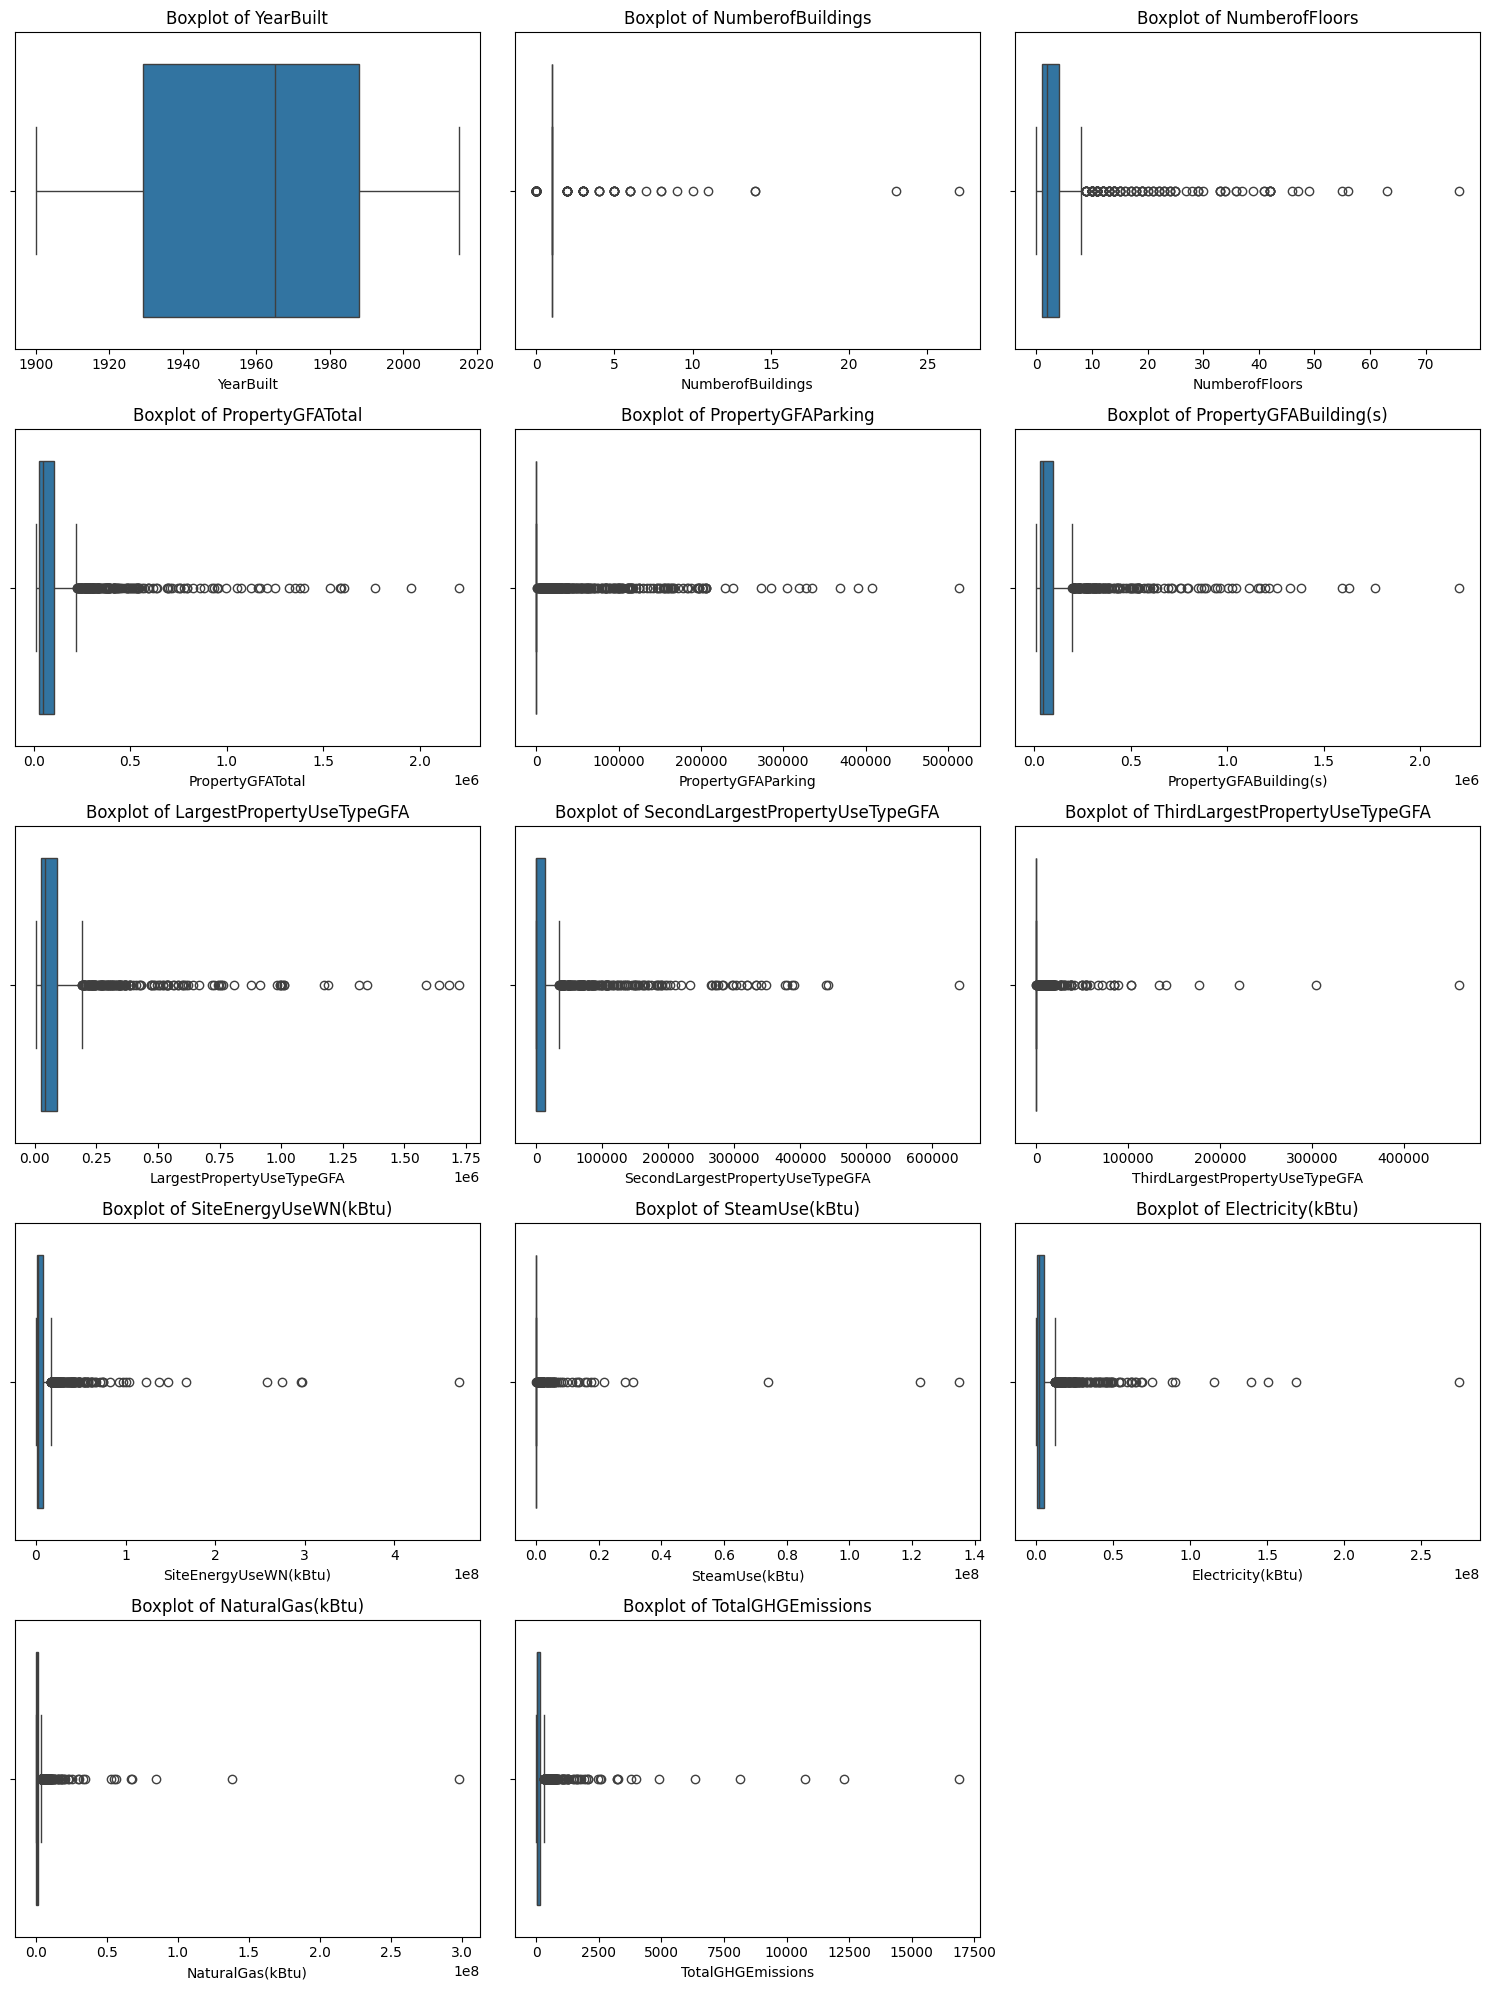

In [42]:
n_cols = 3
n_rows = (len(col_outliers) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(col_outliers):
    sns.boxplot(df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Engineering

Afin d'enrichir le modèle, nous allons créer de nouvelles features qui permettront de capter plus d'information.

In [43]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1512.000000,1512.000000,1512.000000,1.512000e+03,1512.000000,1.512000e+03,1.508000e+03,1512.000000,1512.000000,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1512.000000
mean,1961.397487,1.110450,4.191138,1.151168e+05,13787.576058,1.013293e+05,9.358955e+04,19956.936043,3423.512168,8.457634e+06,4.989914e+05,5.723890e+06,1.993871e+06,184.314173
std,32.901394,1.212268,6.366678,1.988357e+05,43881.913578,1.762073e+05,1.630591e+05,52815.965433,18836.973228,2.298427e+07,5.355205e+06,1.385544e+07,9.773819e+06,734.050627
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,1.092500e+04,5.656000e+03,0.000000,0.000000,5.811420e+04,0.000000e+00,3.000000e+00,0.000000e+00,0.400000
25%,1929.000000,1.000000,1.000000,2.880000e+04,0.000000,2.780000e+04,2.497975e+04,0.000000,0.000000,1.327599e+06,0.000000e+00,7.288942e+05,0.000000e+00,20.262500
50%,1965.000000,1.000000,2.000000,4.769250e+04,0.000000,4.579250e+04,4.159550e+04,0.000000,0.000000,2.807050e+06,0.000000e+00,1.676576e+06,4.783005e+05,49.540000
75%,1988.000000,1.000000,4.000000,1.060102e+05,0.000000,9.506750e+04,9.171750e+04,13677.500000,0.000000,7.421858e+06,0.000000e+00,5.238197e+06,1.495877e+06,141.387500
max,2015.000000,27.000000,76.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,459748.000000,4.716139e+08,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000


Nous créer 5 nouvelles features, 3 correspondantes au mix énergétique du bâtiment, 1 étant la part de la surface du parking dans la surface totale du bâtiment et 1 étant l'âge du bâtiment.

In [44]:
df['Electricity_Part'] = df['Electricity(kBtu)'] / df['SiteEnergyUseWN(kBtu)'] * 100
df['NaturalGas_Part'] = df['NaturalGas(kBtu)'] / df['SiteEnergyUseWN(kBtu)'] * 100
df['Steam_Part'] = df['SteamUse(kBtu)'] / df['SiteEnergyUseWN(kBtu)'] * 100

df['ParkingGFA_Part'] = df['PropertyGFAParking'] / df['PropertyGFATotal'] * 100

df['BuildingAge'] = 2025 - df['YearBuilt']

In [45]:
df.shape

(1512, 25)

Une fois les features créées, nous pouvons supprimer les colonnes correspondant à la consommation des différentes sources d'énergie pour éviter le data leakage.

In [46]:
df = df.drop(columns=['YearBuilt','Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)'])

In [47]:
df.shape

(1512, 21)

In [48]:
numeric_cols = df.select_dtypes(include='number').columns

Pour rappel, les distributions des variables numériques sont très asymétriques, nous allons transformer ces variables en leur logarithme pour recentrer ces distributions ce qui permettra au modèle une meilleure prédiction.

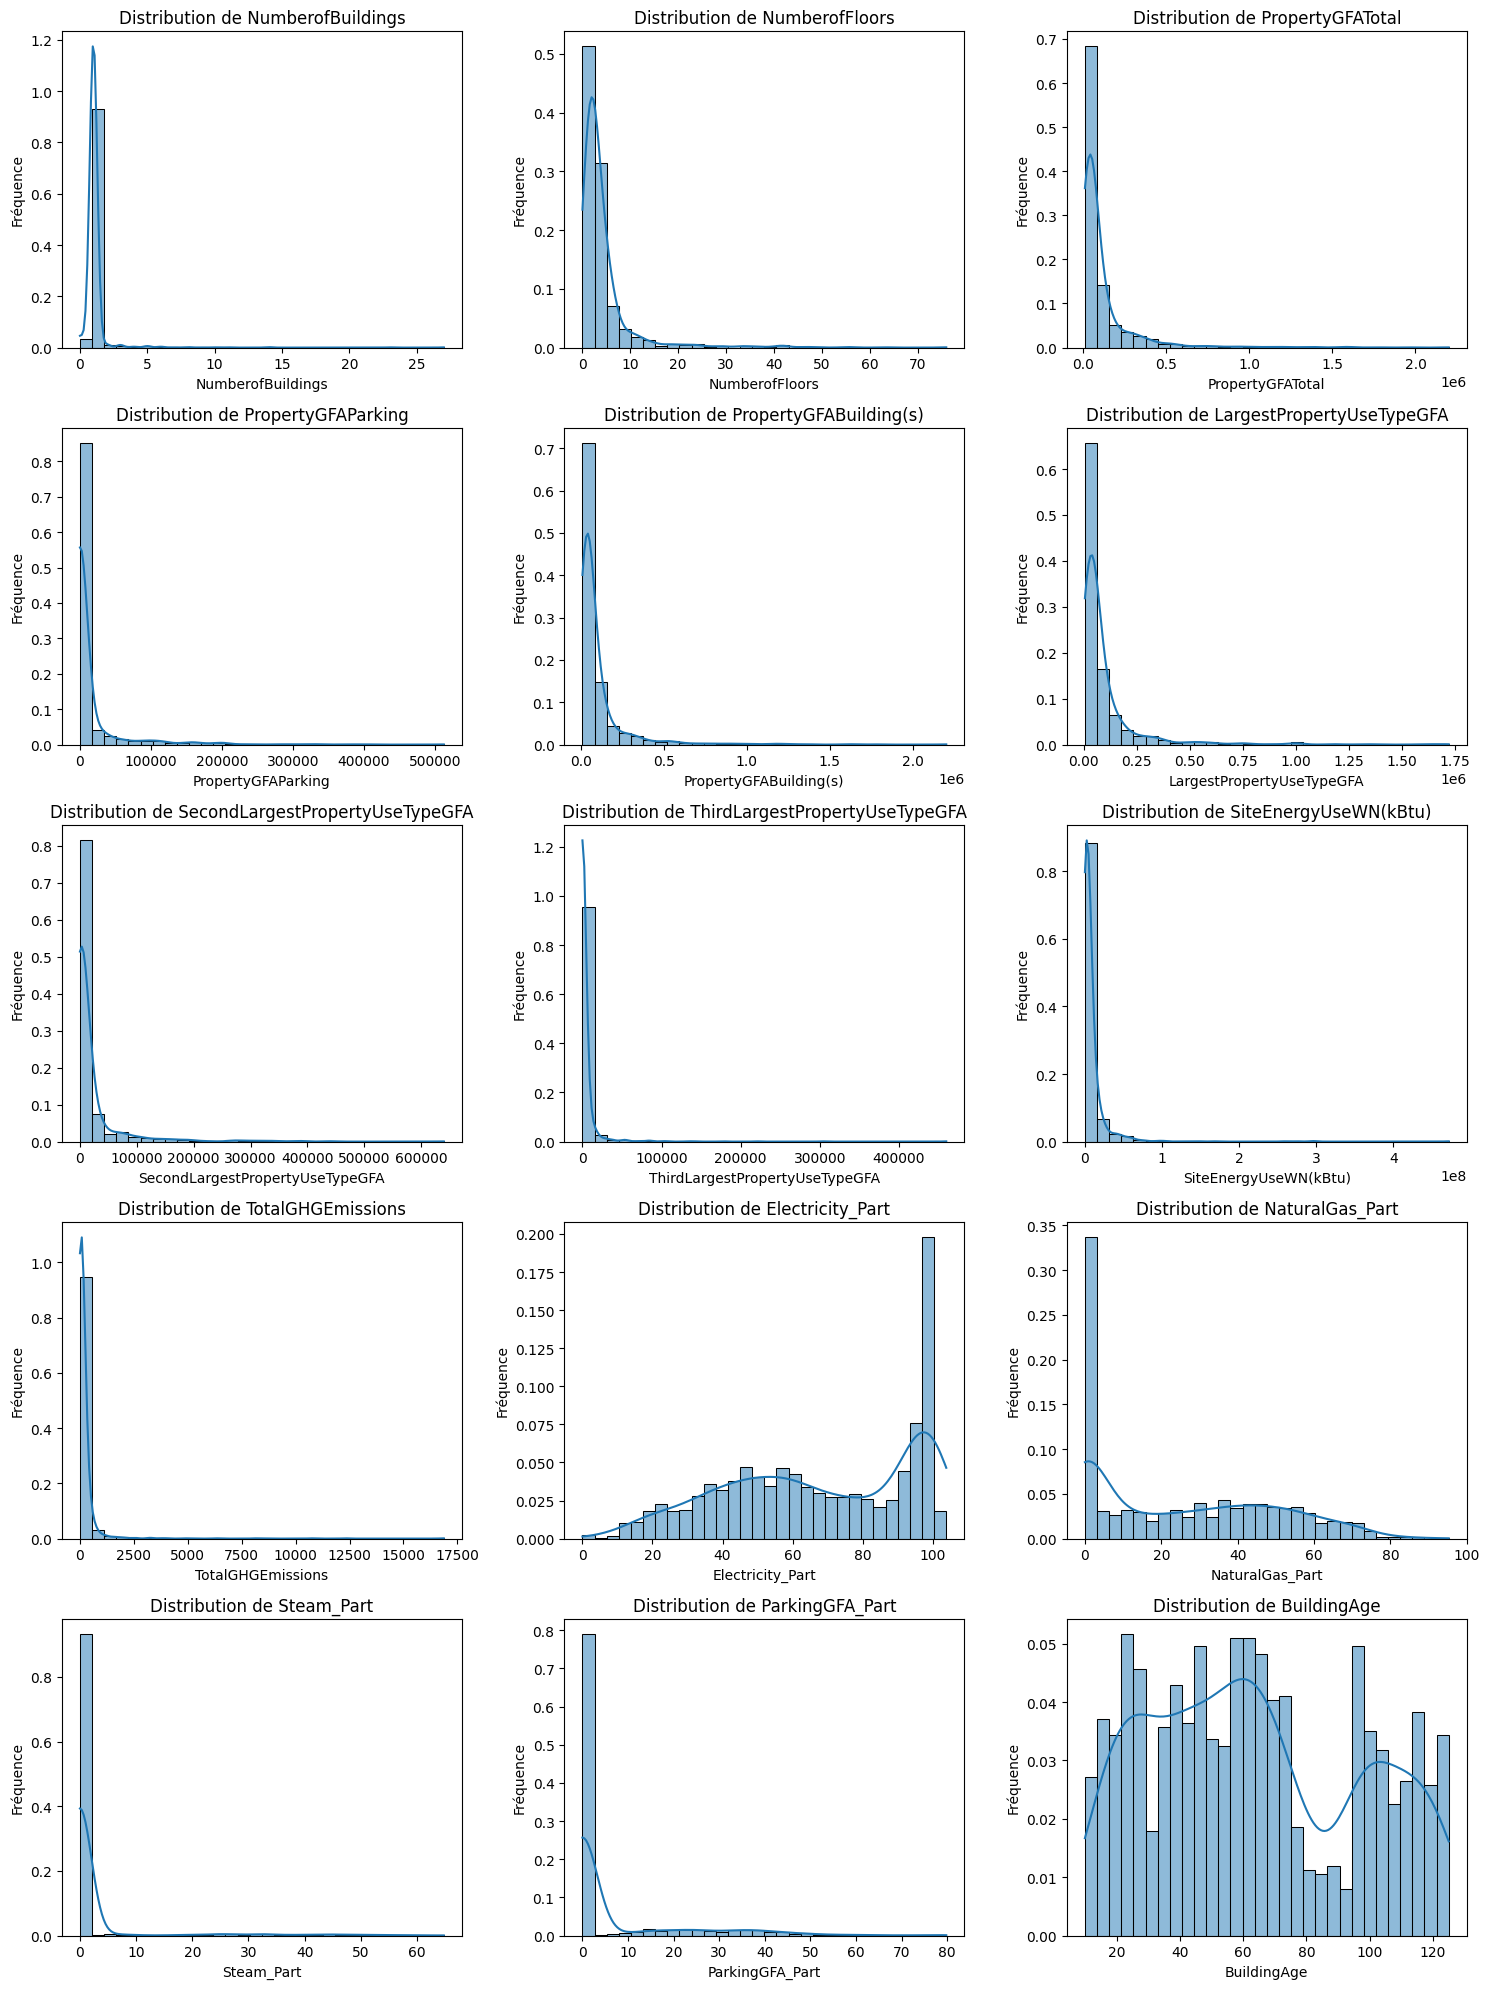

In [49]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, stat='probability', bins=30, ax=axes[i])
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Distribution de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

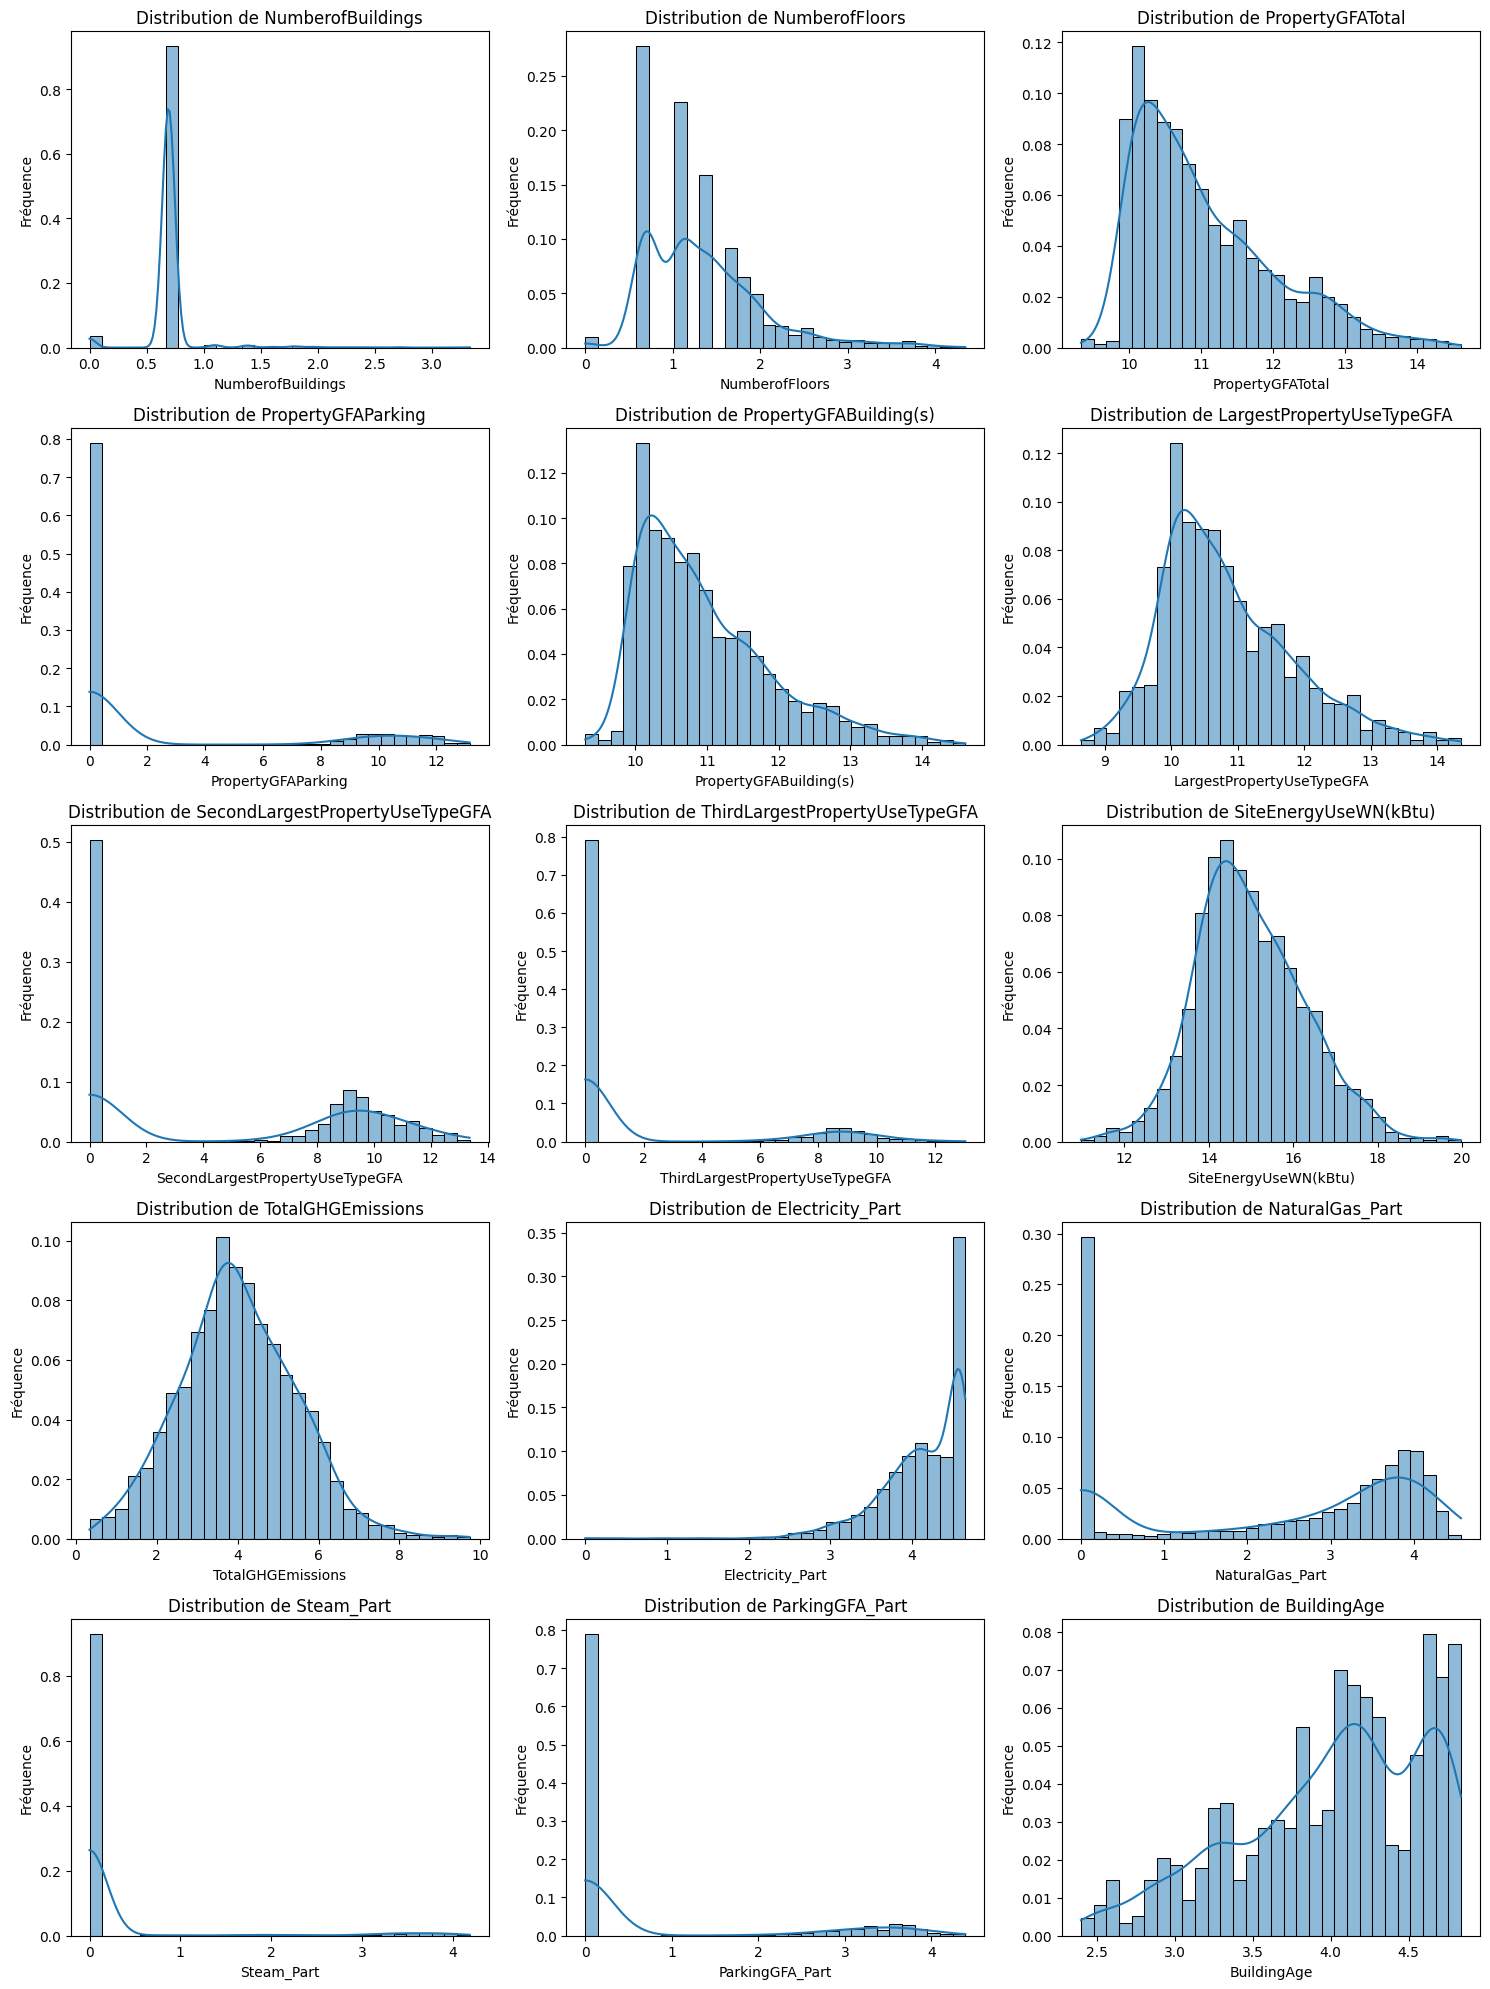

In [50]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(np.log1p(df[col]), kde=True, stat='probability', bins=30, ax=axes[i])
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Distribution de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

La transformation en logarithme permet effectivement de recentrer la distribution de certaines variables sauf pour les features créées. 

Nous allons donc transformer seulement celles pour lesquelles la transformation en logarithme permet de recentrer la distribution.

In [51]:
col_to_log = np.setdiff1d(df.select_dtypes(include='number').columns,['Steam_Part','Electricity_Part','NaturalGas_Part','ParkingGFA_Part'])

df[col_to_log] = df[col_to_log].apply(np.log1p)

In [52]:
df.to_csv('data/data_featured.csv', encoding='utf-8', sep=';')